* Họ và tên: Huỳnh Thanh Hà
* MSSV - 22520369

# **Bài toán dự đoán điểm thực hành**

In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 9.9 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import json
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns
from catboost import CatBoostRegressor

## **Data understanding**

In [ ]:
submissions = pd.read_csv('annonimized.csv')
scores = pd.read_csv('th-public.csv')

In [ ]:
# size of data
print("annonimized.csv:")
print(f"Row: {len(submissions)}, Column: {submissions.shape[1]}")
print("th-public.csv:")
print(f"Row: {len(scores)}, Colum: {scores.shape[1]}")

annonimized.csv:
Row: 295198, Column: 11
th-public.csv:
Row: 761, Colum: 2


In [ ]:
submissions.head()

,"concat('it001',`assignment_id`)","concat('it001',`problem_id`)","concat('it001', username)",is_final,status,pre_score,coefficient,"concat('it001',`language_id`)",created_at,updated_at,judgement
0,90ce27571176d87961b565d5ef4b3de33ede04ac,789454427dd4097a14749e3dde63346b7a8d3811,ed9eaeb6a707f50154024b24d7efcb874a9795dd,0,SCORE,0,100,it0012,10-09 08:02:04,10-09 08:06:58,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0..."
1,90ce27571176d87961b565d5ef4b3de33ede04ac,789454427dd4097a14749e3dde63346b7a8d3811,ed9eaeb6a707f50154024b24d7efcb874a9795dd,0,SCORE,0,100,it0012,10-09 08:04:41,10-09 08:04:51,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0..."
2,90ce27571176d87961b565d5ef4b3de33ede04ac,789454427dd4097a14749e3dde63346b7a8d3811,ed9eaeb6a707f50154024b24d7efcb874a9795dd,1,SCORE,10000,100,it0012,10-09 08:06:49,10-09 08:06:58,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0..."
3,90ce27571176d87961b565d5ef4b3de33ede04ac,bf96fbdc5f499538c3e2bfbec5779c8a14b0a9ff,ed9eaeb6a707f50154024b24d7efcb874a9795dd,1,SCORE,10000,100,it0012,10-09 08:47:52,10-09 08:48:01,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0..."
4,90ce27571176d87961b565d5ef4b3de33ede04ac,7a6e5ca470ff47c3b5048f240c4738de71010c78,ed9eaeb6a707f50154024b24d7efcb874a9795dd,1,SCORE,10000,100,it0012,10-09 09:19:35,10-09 09:19:45,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0..."


In [ ]:
scores.head()

,hash,TH
0,00b6dd4fc7eb817e03708c532016ef30ce564a61,5
1,00bef8afee8f3c595d535c9c03c490cac1a4f021,8.5
2,01122b3ef7e59b84189e65985305f575d6bdf83c,7
3,013de369c439ab0ead8aa7da64423aa395a8be39,10
4,014c59c6433fd764a0b08de6ffeb757eaf60aa73,6


In [ ]:
submissions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 295198 entries, 0 to 295197
Data columns (total 11 columns):
 #   Column                           Non-Null Count   Dtype 
---  ------                           --------------   ----- 
 0   concat('it001',`assignment_id`)  295198 non-null  object
 1   concat('it001',`problem_id`)     295198 non-null  object
 2   concat('it001', username)        295198 non-null  object
 3   is_final                         295198 non-null  int64 
 4   status                           295198 non-null  object
 5   pre_score                        295198 non-null  int64 
 6   coefficient                      295198 non-null  int64 
 7   concat('it001',`language_id`)    295198 non-null  object
 8   created_at                       295198 non-null  object
 9   updated_at                       295198 non-null  object
 10  judgement                        295198 non-null  object
dtypes: int64(3), object(8)
memory usage: 24.8+ MB


In [ ]:
scores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 761 entries, 0 to 760
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   hash    761 non-null    object
 1   TH      755 non-null    object
dtypes: object(2)
memory usage: 12.0+ KB


In [ ]:
# check null
submissions.isna().sum()

,0
"concat('it001',`assignment_id`)",0
"concat('it001',`problem_id`)",0
"concat('it001', username)",0
is_final,0
status,0
pre_score,0
coefficient,0
"concat('it001',`language_id`)",0
created_at,0
updated_at,0


In [ ]:
scores.isna().sum()

,0
hash,0
TH,6


**Mô tả data:**

* Mô tả các cột trong `annonimized.csv`:

  * assignment_id, problem_id → bài tập cụ thể.
  * username → mã số sinh viên (ẩn danh).
  * is_final → lần nộp cuối cùng hay không.
  * status → code có chạy không (ví dụ: Accepted, Runtime Error, v.v).
  * pre_score → % test case đúng (làm tròn).
  * coefficient → hệ số phạt nộp muộn.
  * language_id → ngôn ngữ lập trình.
  * created_at, updated_at → ngày giờ nộp và chấm bài.
  * judgement → kết quả chi tiết chấm bài.

---

*  Mô tả các cột trong `th-public.csv`:

| Cột | Mô tả |
|-----|------|
| `hash` | Mã số sinh viên đã được ẩn danh |
| `TH` | Điểm thực hành môn IT001 (giá trị mục tiêu cần dự đoán) |



## **2. Làm sạch và Chuẩn bị data (Data Cleaning & Preparation)**

Sau khi hiểu được cấu trúc dữ liệu, bước tiếp theo là làm sạch và chuẩn bị dữ liệu để có thể sử dụng trong việc huấn luyện mô hình.

Bước này gồm nhưng việc sau:
- Làm sạch cột `TH` trong `th-public.csv`, chuyển sang kiểu số.
- Chuyển đổi thời gian `created_at` và `evaluated_at` để phân tích theo ngày.
- Tính thời điểm nộp bài dưới dạng số (`submission_day`) để dùng như feature.
- Parse cột `judgement` chứa thông tin về từng test case (số testcase sai, thời gian, bộ nhớ).
- Kiểm tra và điền các giá trị thiếu (missing values).


In [ ]:
scores['TH'] = pd.to_numeric(scores['TH'], errors='coerce')
print(f"Number of NaN value in 'TH' after cleaning: {scores['TH'].isna().sum()}")

Number of NaN value in 'TH' after cleaning: 8


In [ ]:
scores = scores.dropna(subset=['TH'])

In [ ]:
submissions['month'] = submissions['created_at'].str.split('-').str[0].astype(int)
submissions['day'] = submissions['created_at'].str.split('-').str[1].str.split(' ').str[0].astype(int)
submissions['submission_day'] = submissions['month'] * 30 + submissions['day']

In [ ]:
problem_success_rate = submissions[submissions['is_final'] == 1].groupby("concat('it001',`problem_id`)")['pre_score'].apply(lambda x: (x == 10000).mean()).to_dict()
submissions['problem_difficulty'] = submissions["concat('it001',`problem_id`)"].map(problem_success_rate)

assignment_success_rate = submissions[submissions['is_final'] == 1].groupby("concat('it001',`assignment_id`)")['pre_score'].apply(lambda x: (x == 10000).mean()).to_dict()
submissions['assignment_difficulty'] = submissions["concat('it001',`assignment_id`)"].map(assignment_success_rate)

In [ ]:
problem_difficulty_bins = pd.qcut(submissions['problem_difficulty'], q=3, labels=['easy', 'medium', 'hard'], duplicates='drop')
submissions['problem_difficulty_category'] = problem_difficulty_bins

Cột `judgement` chứa một chuỗi JSON biểu diễn kết quả chạy từng test case (bộ nhớ, thời gian, số testcase sai).
Ta cần tách ra 3 thông tin:
- `wrong_count`: số test case sai
- `avg_time`: thời gian trung bình
- `avg_mem`: bộ nhớ trung bình


In [ ]:
# Parse judgement column
def parse_judgement(judgement_str):
    try:
        judgement_str = judgement_str.replace('\xa0', '').replace('""', '"')
        judgement = json.loads(judgement_str)
        wrong_count = judgement.get('verdicts', {}).get('WRONG', 0)
        times = judgement.get('times', [])
        mems = judgement.get('mems', [])
        return (wrong_count,
                np.mean(times) if times and all(isinstance(t, (int, float)) for t in times) else 0,
                np.mean(mems) if mems and all(isinstance(m, (int, float)) for m in mems) else 0)
    except:
        return 0, 0, 0

submissions[['wrong_count', 'avg_time', 'avg_mem']] = submissions['judgement'].apply(parse_judgement).apply(pd.Series)

## **Feature engineering**

In [ ]:
# Feature engineering
def extract_features(group):
    def count_attempts(group):
        attempts = 0
        for problem_id in group["concat('it001',`problem_id`)"].unique():
            problem_submissions = group[group["concat('it001',`problem_id`)"] == problem_id]
            if (problem_submissions['pre_score'] == 10000).any():
                attempts += len(problem_submissions[problem_submissions['pre_score'] < 10000])
        return attempts / group["concat('it001',`problem_id`)"].nunique() if group["concat('it001',`problem_id`)"].nunique() > 0 else 0

    features = {}
    features['num_submissions'] = len(group)
    features['num_final_submissions'] = group['is_final'].sum()
    features['compile_error_rate'] = (group['status'] == 'Compilation Error').mean()
    features['num_problems'] = group["concat('it001',`problem_id`)"].nunique()
    features['num_assignments'] = group["concat('it001',`assignment_id`)"].nunique()
    features['min_submission_day'] = group['submission_day'].min()
    features['submission_time_range'] = group['submission_day'].max() - group['submission_day'].min()
    features['problem_completion_rate'] = group[group['is_final'] == 1]['pre_score'].eq(10000).sum() / group["concat('it001',`problem_id`)"].nunique() if group["concat('it001',`problem_id`)"].nunique() > 0 else 0
    features['weighted_completion_rate'] = group[group['is_final'] == 1].apply(
        lambda x: x['pre_score'] == 10000 and 1 / (x['problem_difficulty'] ** 2) if x['pre_score'] == 10000 and x['problem_difficulty'] > 0 else 0, axis=1
    ).sum() / group["concat('it001',`problem_id`)"].nunique() if group["concat('it001',`problem_id`)"].nunique() > 0 else 0
    features['days_to_deadline'] = 360 - group['submission_day'].min()
    features['final_success_interaction'] = features['num_final_submissions'] * (group[group['is_final'] == 1]['pre_score'].eq(10000).mean() if group['is_final'].sum() > 0 else 0)
    features['problems_success_interaction'] = features['num_problems'] * (group[group['is_final'] == 1]['pre_score'].eq(10000).mean() if group['is_final'].sum() > 0 else 0)
    features['easy_completion_rate'] = group[(group['is_final'] == 1) & (group['problem_difficulty_category'] == 'easy')]['pre_score'].eq(10000).mean() if len(group[(group['is_final'] == 1) & (group['problem_difficulty_category'] == 'easy')]) > 0 else 0
    features['medium_completion_rate'] = group[(group['is_final'] == 1) & (group['problem_difficulty_category'] == 'medium')]['pre_score'].eq(10000).mean() if len(group[(group['is_final'] == 1) & (group['problem_difficulty_category'] == 'medium')]) > 0 else 0
    features['assignment_completion_rate'] = group[group['is_final'] == 1]['pre_score'].eq(10000).sum() / group["concat('it001',`assignment_id`)"].nunique() if group["concat('it001',`assignment_id`)"].nunique() > 0 else 0
    features['avg_assignment_difficulty'] = group['assignment_difficulty'].mean()
    features['avg_attempts_before_success'] = count_attempts(group)
    return pd.Series(features)

In [ ]:
features_df = submissions.groupby("concat('it001', username)").apply(extract_features, include_groups=False).reset_index()

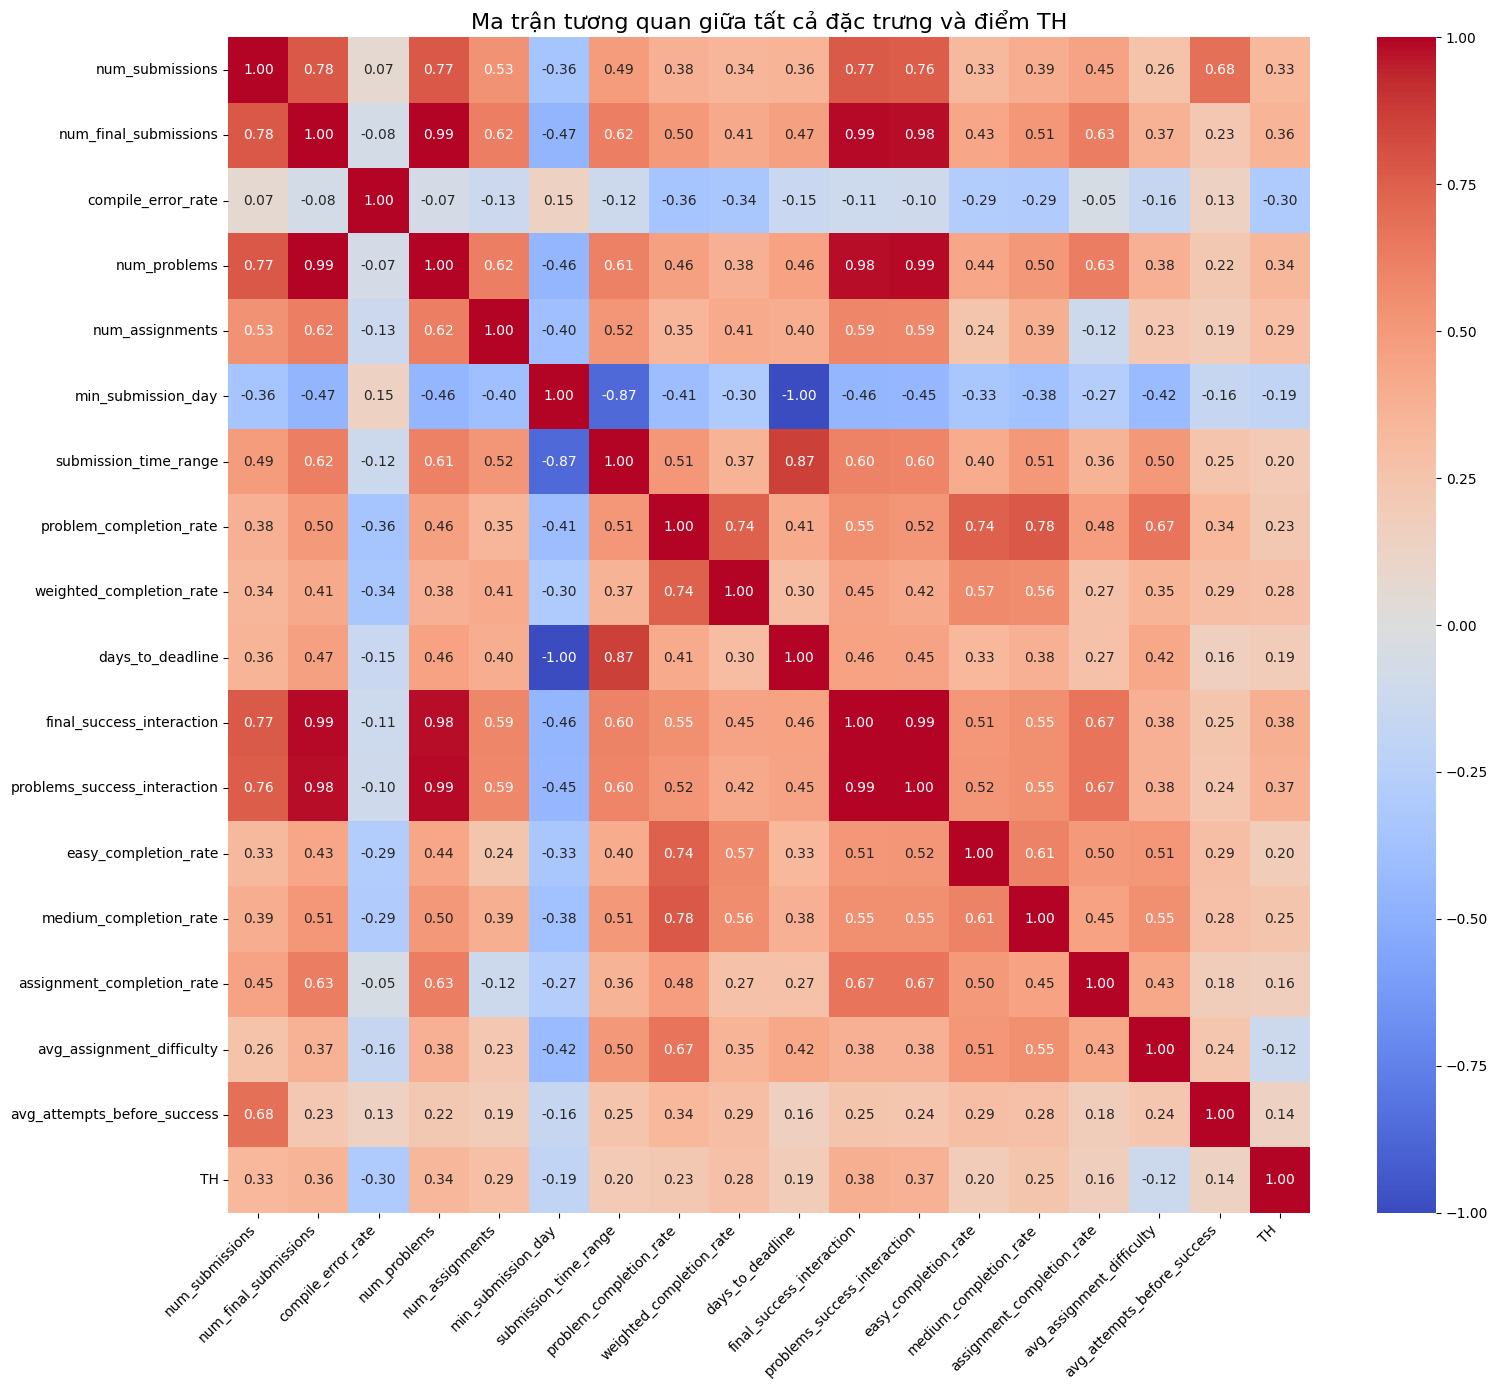

In [ ]:
full_corr_df = features_df.merge(scores, left_on='concat(\'it001\', username)', right_on='hash', how='left')
full_corr_df = full_corr_df.dropna(subset=['TH'])

corr_matrix = full_corr_df.drop(columns=['concat(\'it001\', username)', 'hash']).corr(numeric_only=True)

plt.figure(figsize=(16, 14))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt=".2f", cbar=True)
plt.title("Ma trận tương quan giữa tất cả đặc trưng và điểm TH", fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

## 6. Chuẩn bị Dữ liệu và Huấn luyện Mô hình

Ở phần này, chúng ta sẽ:

1. Merge đặc trưng với điểm thật (`TH`)
2. Chia dữ liệu thành tập huấn luyện và tập cần dự đoán
3. Chuẩn hóa đặc trưng bằng StandardScaler
4. Xử lý ngoại lệ (clipping)
5. Huấn luyện mô hình CatBoostRegressor
6. Đánh giá hiệu quả bằng R² Score



In [ ]:
# Merge với scores
data = features_df.merge(scores, left_on="concat('it001', username)", right_on='hash', how='left')

# Split dữ liệu
train_data = data[data['TH'].notna()]
test_data = data[data['TH'].isna()]

# Chuẩn bị X, y
X = train_data.drop(["concat('it001', username)", 'hash', 'TH'], axis=1)
y = train_data['TH']
X_predict = test_data.drop(["concat('it001', username)", 'hash', 'TH'], axis=1)

# Làm sạch dữ liệu
for col in X.columns:
    X[col] = pd.to_numeric(X[col], errors='coerce').fillna(0)
for col in X_predict.columns:
    X_predict[col] = pd.to_numeric(X_predict[col], errors='coerce').fillna(0)

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_predict_scaled = scaler.transform(X_predict)

In [ ]:
# Hàm làm tròn điểm đến 0.5
def round_to_half(x):
    return np.round(x * 2) / 2

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error

X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

y_train_rounded = np.clip(round_to_half(y_train), 0, 10)
y_val_rounded = np.clip(round_to_half(y_val), 0, 10)

In [ ]:
models = {
    'CatBoost': (CatBoostRegressor(verbose=0, random_seed=42), {
        'iterations': [100, 300, 500],
        'depth': [3, 4, 6],
        'learning_rate': [0.01, 0.03, 0.1],
        'l2_leaf_reg': [1, 3, 5]
    }),
    'XGBoost': (XGBRegressor(verbosity=0, random_state=42), {
        'n_estimators': [100, 300, 500],
        'max_depth': [3, 4, 6],
        'learning_rate': [0.01, 0.03, 0.1],
        'reg_lambda': [1, 3, 5]
    }),
    'RandomForest': (RandomForestRegressor(random_state=42), {
        'n_estimators': [100, 300, 500],
        'max_depth': [None, 10, 20],
        'max_features': ['auto', 'sqrt']
    }),
    'ExtraTrees': (ExtraTreesRegressor(random_state=42), {
        'n_estimators': [100, 300, 500],
        'max_depth': [None, 10, 20],
        'max_features': ['auto', 'sqrt']
    }),
    'GradientBoosting': (GradientBoostingRegressor(random_state=42), {
        'n_estimators': [100, 300, 500],
        'max_depth': [3, 4, 6],
        'learning_rate': [0.01, 0.03, 0.1]
    })
}

In [ ]:
best_models = {}

for name, (model, params) in models.items():
    print(f"\Tuning {name}...")
    search = RandomizedSearchCV(model, param_distributions=params, n_iter=10, cv=3, scoring='neg_mean_squared_error', random_state=42, n_jobs=-1)
    search.fit(X_train, y_train_rounded)

    best_model = search.best_estimator_
    preds = best_model.predict(X_val)
    mse = mean_squared_error(y_val_rounded, preds)

    best_models[name] = {
        'model': best_model,
        'mse': mse,
        'params': search.best_params_
    }

    print(f"Best MSE for {name}: {mse:.4f}")
    print(f"Best Params: {search.best_params_}")

\Tuning CatBoost...
Best MSE for CatBoost: 2.9887
Best Params: {'learning_rate': 0.03, 'l2_leaf_reg': 5, 'iterations': 300, 'depth': 6}
\Tuning XGBoost...
Best MSE for XGBoost: 3.1335
Best Params: {'reg_lambda': 3, 'n_estimators': 300, 'max_depth': 3, 'learning_rate': 0.01}
\Tuning RandomForest...


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
15 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
6 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/_p

Best MSE for RandomForest: 3.2100
Best Params: {'n_estimators': 300, 'max_features': 'sqrt', 'max_depth': 20}
\Tuning ExtraTrees...


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
15 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
9 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/_p

Best MSE for ExtraTrees: 3.2324
Best Params: {'n_estimators': 300, 'max_features': 'sqrt', 'max_depth': 20}
\Tuning GradientBoosting...
Best MSE for GradientBoosting: 3.0955
Best Params: {'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.03}


In [ ]:

model = CatBoostRegressor(iterations=300, depth=4, learning_rate=0.03, l2_leaf_reg=3.0, random_seed=42, verbose=0)
model.fit(X_train, y_train_rounded)


## **Đánh giá và submit**

In [ ]:
y_pred = model.predict(X_val)
y_pred_rounded = round_to_half(y_pred)
print(f"R² Score (huấn luyện với điểm làm tròn): {r2_score(y_val_rounded, y_pred_rounded)}")
print(f"R² Score (CatBoost, không làm tròn): {r2_score(y_val, y_pred)}")
print(f"Phân phối điểm làm tròn trên tập validation: {np.unique(y_val_rounded, return_counts=True)}")

R² Score (huấn luyện với điểm làm tròn): 0.38028667951165995
R² Score (CatBoost, không làm tròn): 0.39217806808138345
Phân phối điểm làm tròn trên tập validation: (array([ 1. ,  1.5,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,  5.5,  6. ,  6.5,
        7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. ]), array([ 1,  2,  2,  3,  7,  3,  6,  7,  5,  9, 10,  4,  7, 14, 13, 22, 20,
       16]))


In [ ]:
predictions = model.predict(X_predict_scaled)
predictions_rounded = np.clip(round_to_half(predictions), 0, 10)

# Tạo file submission
submission = pd.DataFrame({'hash': test_data["concat('it001', username)"], 'TH': predictions_rounded})
all_usernames = pd.DataFrame({'hash': submissions["concat('it001', username)"].unique()})
submission = all_usernames.merge(submission, on='hash', how='left').fillna(0)
submission['TH'] = np.clip(round_to_half(submission['TH']), 0, 10)
submission.to_csv('submission.csv', index=False)

# Bài toán dự đoán điểm quá trình

In [ ]:
# 0.39 in wecode
import pandas as pd
import json
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns
from catboost import CatBoostRegressor

# Hàm làm tròn điểm đến 0.5
def round_to_half(x):
    return np.round(x * 2) / 2

# Load data
submissions = pd.read_csv('annonimized.csv')
scores = pd.read_csv('qt-public.csv')

# Làm sạch cột TH
scores['diemqt'] = pd.to_numeric(scores['diemqt'], errors='coerce')
print(f"Số giá trị NaN trong diemqt sau khi làm sạch: {scores['diemqt'].isna().sum()}")
scores = scores.dropna(subset=['diemqt'])

# Thêm cột thời gian
submissions['month'] = submissions['created_at'].str.split('-').str[0].astype(int)
submissions['day'] = submissions['created_at'].str.split('-').str[1].str.split(' ').str[0].astype(int)
submissions['submission_day'] = submissions['month'] * 30 + submissions['day']

# Thêm độ khó bài tập và assignment
problem_success_rate = submissions[submissions['is_final'] == 1].groupby("concat('it001',`problem_id`)")['pre_score'].apply(lambda x: (x == 10000).mean()).to_dict()
submissions['problem_difficulty'] = submissions["concat('it001',`problem_id`)"].map(problem_success_rate)
assignment_success_rate = submissions[submissions['is_final'] == 1].groupby("concat('it001',`assignment_id`)")['pre_score'].apply(lambda x: (x == 10000).mean()).to_dict()
submissions['assignment_difficulty'] = submissions["concat('it001',`assignment_id`)"].map(assignment_success_rate)

# Phân loại độ khó
problem_difficulty_bins = pd.qcut(submissions['problem_difficulty'], q=3, labels=['easy', 'medium', 'hard'], duplicates='drop')
submissions['problem_difficulty_category'] = problem_difficulty_bins

# Parse judgement column
def parse_judgement(judgement_str):
    try:
        judgement_str = judgement_str.replace('\xa0', '').replace('""', '"')
        judgement = json.loads(judgement_str)
        wrong_count = judgement.get('verdicts', {}).get('WRONG', 0)
        times = judgement.get('times', [])
        mems = judgement.get('mems', [])
        return (wrong_count,
                np.mean(times) if times and all(isinstance(t, (int, float)) for t in times) else 0,
                np.mean(mems) if mems and all(isinstance(m, (int, float)) for m in mems) else 0)
    except:
        return 0, 0, 0

submissions[['wrong_count', 'avg_time', 'avg_mem']] = submissions['judgement'].apply(parse_judgement).apply(pd.Series)

# Feature engineering
def extract_features(group):
    def count_attempts(group):
        attempts = 0
        for problem_id in group["concat('it001',`problem_id`)"].unique():
            problem_submissions = group[group["concat('it001',`problem_id`)"] == problem_id]
            if (problem_submissions['pre_score'] == 10000).any():
                attempts += len(problem_submissions[problem_submissions['pre_score'] < 10000])
        return attempts / group["concat('it001',`problem_id`)"].nunique() if group["concat('it001',`problem_id`)"].nunique() > 0 else 0

    features = {}
    features['num_submissions'] = len(group)
    features['num_final_submissions'] = group['is_final'].sum()
    features['compile_error_rate'] = (group['status'] == 'Compilation Error').mean()
    features['num_problems'] = group["concat('it001',`problem_id`)"].nunique()
    features['num_assignments'] = group["concat('it001',`assignment_id`)"].nunique()
    features['min_submission_day'] = group['submission_day'].min()
    features['submission_time_range'] = group['submission_day'].max() - group['submission_day'].min()
    features['problem_completion_rate'] = group[group['is_final'] == 1]['pre_score'].eq(10000).sum() / group["concat('it001',`problem_id`)"].nunique() if group["concat('it001',`problem_id`)"].nunique() > 0 else 0
    features['weighted_completion_rate'] = group[group['is_final'] == 1].apply(
        lambda x: x['pre_score'] == 10000 and 1 / (x['problem_difficulty'] ** 2) if x['pre_score'] == 10000 and x['problem_difficulty'] > 0 else 0, axis=1
    ).sum() / group["concat('it001',`problem_id`)"].nunique() if group["concat('it001',`problem_id`)"].nunique() > 0 else 0
    features['days_to_deadline'] = 360 - group['submission_day'].min()
    features['final_success_interaction'] = features['num_final_submissions'] * (group[group['is_final'] == 1]['pre_score'].eq(10000).mean() if group['is_final'].sum() > 0 else 0)
    features['problems_success_interaction'] = features['num_problems'] * (group[group['is_final'] == 1]['pre_score'].eq(10000).mean() if group['is_final'].sum() > 0 else 0)
    features['easy_completion_rate'] = group[(group['is_final'] == 1) & (group['problem_difficulty_category'] == 'easy')]['pre_score'].eq(10000).mean() if len(group[(group['is_final'] == 1) & (group['problem_difficulty_category'] == 'easy')]) > 0 else 0
    features['medium_completion_rate'] = group[(group['is_final'] == 1) & (group['problem_difficulty_category'] == 'medium')]['pre_score'].eq(10000).mean() if len(group[(group['is_final'] == 1) & (group['problem_difficulty_category'] == 'medium')]) > 0 else 0
    features['assignment_completion_rate'] = group[group['is_final'] == 1]['pre_score'].eq(10000).sum() / group["concat('it001',`assignment_id`)"].nunique() if group["concat('it001',`assignment_id`)"].nunique() > 0 else 0
    features['avg_assignment_difficulty'] = group['assignment_difficulty'].mean()
    features['avg_attempts_before_success'] = count_attempts(group)
    return pd.Series(features)

# Group và extract features
features_df = submissions.groupby("concat('it001', username)").apply(extract_features, include_groups=False).reset_index()

# Merge với scores
data = features_df.merge(scores, left_on="concat('it001', username)", right_on='hash', how='left')

# Split dữ liệu
train_data = data[data['diemqt'].notna()]
test_data = data[data['diemqt'].isna()]

# Chuẩn bị X, y
X = train_data.drop(["concat('it001', username)", 'hash', 'diemqt'], axis=1)
y = train_data['diemqt']
X_predict = test_data.drop(["concat('it001', username)", 'hash', 'diemqt'], axis=1)

# Làm sạch dữ liệu
for col in X.columns:
    X[col] = pd.to_numeric(X[col], errors='coerce').fillna(0)
for col in X_predict.columns:
    X_predict[col] = pd.to_numeric(X_predict[col], errors='coerce').fillna(0)

# Xử lý ngoại lệ
X['num_final_submissions'] = X['num_final_submissions'].clip(upper=100)
X_predict['num_final_submissions'] = X_predict['num_final_submissions'].clip(upper=100)
X['compile_error_rate'] = X['compile_error_rate'].clip(upper=0.5)
X_predict['compile_error_rate'] = X_predict['compile_error_rate'].clip(upper=0.5)

# Chuẩn hóa đặc trưng
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_predict_scaled = scaler.transform(X_predict)

# Visualization
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(train_data['num_final_submissions'], bins=20, kde=True, label='Train')
sns.histplot(test_data['num_final_submissions'], bins=20, kde=True, label='Test')
plt.title('Phân phối Số bài nộp cuối cùng')
plt.legend()

plt.subplot(1, 2, 2)
sns.histplot(train_data['compile_error_rate'], bins=20, kde=True, label='Train')
sns.histplot(test_data['compile_error_rate'], bins=20, label='Test')
plt.title('Phân phối Tỷ lệ lỗi biên dịch')
plt.legend()
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(x=train_data['assignment_completion_rate'], y=train_data['diemqt'])
plt.title('Mối quan hệ giữa Tỷ lệ hoàn thành assignment và Điểm TH')
plt.xlabel('Tỷ lệ hoàn thành assignment')
plt.ylabel('Điểm diemqt')
plt.show()

correlation_matrix = train_data.drop(["concat('it001', username)", 'hash'], axis=1).corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Ma trận tương quan mới')
plt.show()
print(correlation_matrix['diemqt'].sort_values(ascending=False))

# Chia dữ liệu train/test
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Huấn luyện với điểm làm tròn
y_train_rounded = np.clip(round_to_half(y_train), 0, 10)
y_val_rounded = np.clip(round_to_half(y_val), 0, 10)
model = CatBoostRegressor(iterations=300, depth=4, learning_rate=0.03, l2_leaf_reg=3.0, random_seed=42, verbose=0)
model.fit(X_train, y_train_rounded)

# Đánh giá
y_pred = model.predict(X_val)
y_pred_rounded = round_to_half(y_pred)
print(f"R² Score (huấn luyện với điểm làm tròn): {r2_score(y_val_rounded, y_pred_rounded)}")
print(f"R² Score (CatBoost, không làm tròn): {r2_score(y_val, y_pred)}")
print(f"Phân phối điểm làm tròn trên tập validation: {np.unique(y_val_rounded, return_counts=True)}")

# Dự đoán
predictions = model.predict(X_predict_scaled)
predictions_rounded = np.clip(round_to_half(predictions), 0, 10)

# Tạo file submission
submission = pd.DataFrame({'hash': test_data["concat('it001', username)"], 'diemqt': predictions_rounded})
all_usernames = pd.DataFrame({'hash': submissions["concat('it001', username)"].unique()})
submission = all_usernames.merge(submission, on='hash', how='left').fillna(0)
submission['diemqt'] = np.clip(round_to_half(submission['diemqt']), 0, 10)
submission.to_csv('submission.csv', index=False)

# Bài toán dự đoán điểm thi cuối kỳ

In [ ]:
import pandas as pd
import json
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from catboost import CatBoostRegressor
import matplotlib.pyplot as plt
import seaborn as sns

# Hàm làm tròn điểm đến 0.5
def round_to_half(x):
    return np.clip(np.round(x * 2) / 2, 0, 10)

# Load data
submissions = pd.read_csv('annonimized.csv')
scores = pd.read_csv('ck-public.csv')

# Làm sạch cột diemqt
scores['CK'] = pd.to_numeric(scores['CK'], errors='coerce')
print(f"Số giá trị NaN trong CK sau khi làm sạch: {scores['CK'].isna().sum()}")
scores = scores.dropna(subset=['CK'])

# Thêm cột thời gian
submissions['month'] = submissions['created_at'].str.split('-').str[0].astype(int)
submissions['day'] = submissions['created_at'].str.split('-').str[1].str.split(' ').str[0].astype(int)
submissions['submission_day'] = submissions['month'] * 30 + submissions['day']

# Thêm độ khó bài tập và assignment
problem_success_rate = submissions[submissions['is_final'] == 1].groupby("concat('it001',`problem_id`)")['pre_score'].apply(lambda x: (x == 10000).mean()).to_dict()
submissions['problem_difficulty'] = submissions["concat('it001',`problem_id`)"].map(problem_success_rate)
assignment_success_rate = submissions[submissions['is_final'] == 1].groupby("concat('it001',`assignment_id`)")['pre_score'].apply(lambda x: (x == 10000).mean()).to_dict()
submissions['assignment_difficulty'] = submissions["concat('it001',`assignment_id`)"].map(assignment_success_rate)

# Parse judgement column
def parse_judgement(judgement_str):
    try:
        judgement_str = judgement_str.replace('\xa0', '').replace('""', '"')
        judgement = json.loads(judgement_str)
        wrong_count = judgement.get('verdicts', {}).get('WRONG', 0)
        times = judgement.get('times', [])
        mems = judgement.get('mems', [])
        return (wrong_count,
                np.mean(times) if times and all(isinstance(t, (int, float)) for t in times) else 0,
                np.mean(mems) if mems and all(isinstance(m, (int, float)) for m in mems) else 0)
    except:
        return 0, 0, 0

submissions[['wrong_count', 'avg_time', 'avg_mem']] = submissions['judgement'].apply(parse_judgement).apply(pd.Series)

# Feature engineering
def extract_features(group):
    total_assignments = submissions["concat('it001',`assignment_id`)"].nunique()
    submission_days = group['submission_day'].sort_values()

    features = {}
    features['total_submissions'] = len(group)
    features['num_final_submissions'] = group['is_final'].sum()
    features['num_problems'] = group["concat('it001',`problem_id`)"].nunique()
    features['assignments_attempted'] = group["concat('it001',`assignment_id`)"].nunique()
    features['assignment_coverage'] = group["concat('it001',`assignment_id`)"].nunique() / total_assignments
    features['avg_submissions_per_assignment'] = len(group) / group["concat('it001',`assignment_id`)"].nunique() if group["concat('it001',`assignment_id`)"].nunique() > 0 else 0
    features['submission_frequency'] = len(group) / ((group['submission_day'].max() - group['submission_day'].min()) / 7 + 1) if group['submission_day'].nunique() > 1 else 0
    features['weekly_submission_rate'] = len(group) / ((group['submission_day'].max() - group['submission_day'].min()) / 7 + 1) if group['submission_day'].nunique() > 1 else 0
    features['early_submission_rate'] = len(group[group['submission_day'] < 100]) / len(group) if len(group) > 0 else 0
    features['unique_submission_days'] = group['submission_day'].nunique()
    features['active_weeks'] = len(np.unique(group['submission_day'] // 7))
    features['avg_submission_gap'] = submission_days.diff().mean() if len(submission_days) > 1 else 0
    features['wrong_submission_rate'] = len(group[(group['is_final'] == 1) & (group['pre_score'] < 10000)]) / len(group) if len(group) > 0 else 0
    features['avg_retries_per_problem'] = group.groupby("concat('it001',`problem_id`)").size().mean() if group["concat('it001',`problem_id`)"].nunique() > 0 else 0
    features['partial_score_rate'] = len(group[(group['is_final'] == 1) & (group['pre_score'] > 0) & (group['pre_score'] < 10000)]) / group["concat('it001',`problem_id`)"].nunique() if group["concat('it001',`problem_id`)"].nunique() > 0 else 0
    features['submission_time_range'] = group['submission_day'].max() - group['submission_day'].min()
    features['days_to_deadline'] = 360 - group['submission_day'].min()
    return pd.Series(features)

# Group và extract features
features_df = submissions.groupby("concat('it001', username)").apply(extract_features, include_groups=False).reset_index()

# Merge với scores
data = features_df.merge(scores, left_on="concat('it001', username)", right_on='hash', how='left')

# Split dữ liệu
train_data = data[data['CK'].notna()]
test_data = data[data['CK'].isna()]

# Chuẩn bị X, y
X = train_data.drop(["concat('it001', username)", 'hash', 'CK'], axis=1)
y = train_data['CK']
X_predict = test_data.drop(["concat('it001', username)", 'hash', 'CK'], axis=1)

# Làm sạch dữ liệu
for col in X.columns:
    X[col] = pd.to_numeric(X[col], errors='coerce').fillna(0)
for col in X_predict.columns:
    X_predict[col] = pd.to_numeric(X_predict[col], errors='coerce').fillna(0)

# Xử lý ngoại lệ
X['num_final_submissions'] = X['num_final_submissions'].clip(upper=100)
X_predict['num_final_submissions'] = X_predict['num_final_submissions'].clip(upper=100)

# Chuẩn hóa đặc trưng
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_predict_scaled = scaler.transform(X_predict)

# Visualization
plt.figure(figsize=(8, 6))
sns.histplot(y, bins=20, kde=True)
plt.title('Phân phối điểm quá trình (CK)')
plt.xlabel('Điểm quá trình')
plt.show()

correlation_matrix = train_data.drop(["concat('it001', username)", 'hash'], axis=1).corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Ma trận tương quan với điểm thi cuối kỳ')
plt.show()
print(correlation_matrix['CK'].sort_values(ascending=False))

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(train_data['avg_submissions_per_assignment'], bins=20, kde=True, label='Train')
sns.histplot(test_data['avg_submissions_per_assignment'], bins=20, kde=True, label='Test')
plt.title('Phân phối số lần nộp trung bình mỗi assignment')
plt.legend()

plt.subplot(1, 2, 2)
sns.histplot(train_data['active_weeks'], bins=20, kde=True, label='Train')
sns.histplot(test_data['active_weeks'], bins=20, kde=True, label='Test')
plt.title('Phân phối số tuần tích cực')
plt.legend()
plt.show()

# Chia dữ liệu train/test
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Huấn luyện với điểm làm tròn
y_train_rounded = np.clip(round_to_half(y_train), 0, 10)
y_val_rounded = np.clip(round_to_half(y_val), 0, 10)
model = CatBoostRegressor(iterations=800, depth=3, learning_rate=0.01, l2_leaf_reg=5.0, random_seed=42, verbose=0)
model.fit(X_train, y_train_rounded)

# Đánh giá
y_pred = model.predict(X_val)
y_pred_rounded = round_to_half(y_pred)
print(f"R² Score (huấn luyện với điểm làm tròn): {r2_score(y_val_rounded, y_pred_rounded)}")
print(f"R² Score (CatBoost, không làm tròn): {r2_score(y_val, y_pred)}")
print(f"Phân phối điểm làm tròn trên tập validation: {np.unique(y_val_rounded, return_counts=True)}")

# Dự đoán
predictions = model.predict(X_predict_scaled)
predictions_rounded = np.clip(round_to_half(predictions), 0, 10)

# Tạo file submission
default_score = np.median(train_data['CK'])
submission = pd.DataFrame({'hash': test_data["concat('it001', username)"], 'CK': predictions_rounded})
all_usernames = pd.DataFrame({'hash': submissions["concat('it001', username)"].unique()})
submission = all_usernames.merge(submission, on='hash', how='left').fillna(default_score)
submission['CK'] = np.clip(round_to_half(submission['CK']), 0, 10)
submission.to_csv('submission.csv', index=False)
print(f"Phân phối điểm dự đoán trong submission.csv: {np.unique(submission['CK'], return_counts=True)}")